In [4]:
"""
Consolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)
"""

'\nConsolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)\n'

In [5]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load DFallPa dataset

In [6]:
##### Method: loading functrion"

In [7]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [8]:
# Method 1 - load a single DFallPA
animal = "Pancho"
date = 230126
combine = False
question = "CHAR_BASE_stroke"
# animal = "Diego"
# date = 231211
# combine = True
# question = "CHAR_BASE_stroke"
DFallpa = load_handsaved_wrapper(animal, date, version="stroke", combine_areas=combine, question=question)


Loading DFallpa from:  /lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Pancho-230126-stroke-kilosort_if_exists-norm=None-combine=False-t1=-1.0-t2=1.8-quest=CHAR_BASE_stroke.pkl
TODO: Pancho -- combine circles with the tohers


In [9]:
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels, dfpa_concatbregion_preprocess_wrapper

# LIST_VAR, LIST_VARS_OTHERS, LIST_CONTEXT, LIST_PRUNE_MIN_N_LEVS, LIST_FILTDICT = params_getter_euclidian_vars(question)

# Make a copy of all PA before normalization
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date)


M1_m  ...  16
M1_m  -- n chans final:  16
M1_l  ...  16
M1_l  -- n chans final:  16
PMv_m  ...  12
PMv_m  -- n chans final:  12
PMd_p  ...  23
PMd_p  -- n chans final:  23
PMd_a  ...  15
PMd_a  -- n chans final:  15
dlPFC_p  ...  11
dlPFC_p  -- n chans final:  11
dlPFC_a  ...  6
dlPFC_a  -- n chans final:  6
vlPFC_p  ...  13
vlPFC_p  -- n chans final:  13
vlPFC_a  ...  6
vlPFC_a  -- n chans final:  6
FP_p  ...  6
FP_p  -- n chans final:  6
FP_a  ...  1
FP_a  -- n chans final:  1
SMA_p  ...  31
SMA_p  -- n chans final:  31
SMA_a  ...  20
SMA_a  -- n chans final:  20
preSMA_p  ...  26
preSMA_p  -- n chans final:  26
preSMA_a  ...  16
preSMA_a  -- n chans final:  16
Removing these bad chans: [1002, 1004, 1006]
Chans exist in PA: [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1011, 1012, 1013, 1014, 1015, 1252]
chan 1000 Replacing these trials with mean good trial: [1874, 1990, 1991]
chan 1003 Replacing these trials with mean good trial: [1336, 1337, 1479, 1480, 2016, 2017]
c

In [10]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_sort_by_trialcode

dfallpa_preprocess_sort_by_trialcode(DFallpa)


In [ ]:
# OPTIONAL

from neuralmonkey.classes.population_mult import dfallpa_preprocess_sitesdirty_single_just_drift
PA = DFallpa["pa"].values[0]
dfallpa_preprocess_sitesdirty_single_just_drift(PA, animal, date)



In [11]:
# OPTIONAL

from neuralmonkey.scripts.analy_euclidian_chars_sp import preprocess_pa
from neuralmonkey.classes.population_mult import extract_single_pa

# savedir = "/tmp/PREPROCESS"
# os.makedirs(savedir, exist_ok=True)
PA = preprocess_pa(animal, date, PA, savedir, prune_version=None)


NameError: name 'PA' is not defined

In [ ]:
dflab = PA.Xlabels["trials"]
dflab["supervision_stage_concise"].value_counts()

# Do state space and euclidian

##### First, prune PA to just good data

In [8]:
from pythonlib.tools.pandastools import append_col_with_grp_index
import seaborn as sns
from pythonlib.tools.plottools import savefig

SAVEDIR_ANALYSIS = "/tmp/CHAR_SP_FINAL"
import os

In [ ]:
# Prune to just the DFallpa for testing.


In [ ]:
######### PARAMS
n_min_trials_per_shape = 5
LIST_NPCS_KEEP = [4,6,2]
PLOT_EACH_REGION = True

### State space plots
LIST_VAR = [
    "shape_semantic",
    "shape_semantic",
    "shape_semantic",
]
LIST_VARS_OTHERS = [
    ["task_kind", "stroke_index"],
    ["task_kind", "stroke_index"],
    ["task_kind", "stroke_index"],
]
LIST_CONTEXT = [
    {"same":["stroke_index"], "diff":["task_kind"]},
    {"same":["stroke_index"], "diff":["task_kind"]},
    {"same":["stroke_index"], "diff":["task_kind"]},
]
LIST_PRUNE_MIN_N_LEVS = [2 for _ in range(len(LIST_VAR))]
LIST_FILTDICT = [
    {"task_kind":["prims_single", "character"], "stroke_index":[0]},
    {"task_kind":["prims_single", "character"]},
    {"task_kind":["prims_single", "prims_on_grid"]},
    ]

for twind_analy in [(0.05, 0.25), (-0.05, 0.35), (0.1, 0.2)]:
    for subspace_projection in ["shape_prims_single", "pca"]:
        for prune_version in ["sp_char_0", "sp_char"]:
            for NPCS_KEEP in LIST_NPCS_KEEP:
                for raw_subtract_mean_each_timepoint in [False, True]:
                    SAVEDIR = f"{SAVEDIR_ANALYSIS}/subspc={subspace_projection}-prunedat={prune_version}-npcs={NPCS_KEEP}-subtr={raw_subtract_mean_each_timepoint}-twind={twind_analy}"
                    os.makedirs(SAVEDIR, exist_ok=True)

                    assert False
                    PLOT_STATE_SPACE = NPCS_KEEP == max(LIST_NPCS_KEEP)
                    run(animal, date, DFallpa, SAVEDIR, subspace_projection, prune_version, NPCS_KEEP, 
                            raw_subtract_mean_each_timepoint, n_min_trials_per_shape,
                            PLOT_EACH_REGION, PLOT_STATE_SPACE,
                            LIST_VAR, LIST_VARS_OTHERS, LIST_FILTDICT, LIST_PRUNE_MIN_N_LEVS, twind_analy)


##### Run, a single time

In [8]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import run
import os


In [ ]:
# prune_version = "sp_char_0"
# # subspace_projection = "shape_prims_single"
# subspace_projection = None
# twind_analy = (-0.15, 0.2)
# tbin_dur = 0.1
# tbin_slide = 0.02

prune_version = "sp_char_0"
subspace_projection = "shape_prims_single"
# subspace_projection = None
twind_analy = (0.05, 0.25)
tbin_dur = 0.1
tbin_slide = 0.05

NPCS_KEEP = None
raw_subtract_mean_each_timepoint = False
n_min_trials_per_shape = 5
PLOT_EACH_REGION = False
PLOT_STATE_SPACE = False
LIST_VAR = ["shape_semantic"]
LIST_VARS_OTHERS = [
    ["task_kind", "stroke_index"],
]
LIST_CONTEXT = [
    {"same":["stroke_index"], "diff":["task_kind"]},
]
LIST_PRUNE_MIN_N_LEVS = [2 for _ in range(len(LIST_VAR))]
LIST_FILTDICT = [
    {"task_kind":["prims_single", "character"], "stroke_index":[0]},
    ]

SAVEDIR = f"/tmp/TEST-{twind_analy}"
os.makedirs(SAVEDIR, exist_ok=True)

run(animal, date, DFallpa, SAVEDIR, subspace_projection, prune_version, NPCS_KEEP, 
        raw_subtract_mean_each_timepoint, n_min_trials_per_shape,
        PLOT_EACH_REGION, PLOT_STATE_SPACE,
        LIST_VAR, LIST_VARS_OTHERS, LIST_FILTDICT, LIST_PRUNE_MIN_N_LEVS, twind_analy,
        tbin_dur = tbin_dur, tbin_slide = tbin_slide)


In [ ]:
# Get time-series of eucl distance




##### Run, for a single bregion

In [10]:
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.scripts.analy_euclidian_chars_sp import preprocess_pa
import os

In [11]:
SAVEDIR = f"/tmp/TEST/{animal}-{date}"
os.makedirs(SAVEDIR, exist_ok=True)

In [84]:
bregion = "preSMA_a"    
prune_version = "sp_char_0"
subspace_projection = "shape_prims_single"
# subspace_projection = None
raw_subtract_mean_each_timepoint = False
remove_drift = False

In [85]:
twind_analy = (-0.15, 0.2)
tbin_dur = 0.1
tbin_slide = 0.02


In [ ]:
n_min_trials_per_shape = 5

# Run
PA = extract_single_pa(DFallpa, bregion, which_level="stroke", event="00_stroke")

savedir = f"{SAVEDIR}/preprocess"
os.makedirs(savedir, exist_ok=True)
plot_drawings = False
PA = preprocess_pa(animal, date, PA, savedir, prune_version, 
                    n_min_trials_per_shape=n_min_trials_per_shape, plot_drawings=plot_drawings,
                    remove_chans_fr_drift=remove_drift,
                    subspace_projection=subspace_projection, 
                           twind_analy=twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slide, NPCS_KEEP=NPCS_KEEP)



In [68]:
# Optionally, keep specific chans
# chans_keep = [1053, 1054]
chans_keep = [1044, 1049,  1053, 1054, 1057, 1059, 1062]
PA = PA.slice_by_dim_values_wrapper("chans", chans_keep)


In [78]:
if True:
    pa = PA.slice_by_dim_values_wrapper("times", twind_analy)
    pa = pa.agg_by_time_windows_binned(tbin_dur, tbin_slide)

else:
    subspace_projection = "shape_prims_single"

    if subspace_projection == "pca":
        dim_red_method = "pca"
        superv_dpca_params={
            "superv_dpca_var":None,
            "superv_dpca_vars_group":None,
            "superv_dpca_filtdict":None,
        }
    elif subspace_projection == "shape_prims_single":
        dim_red_method = "superv_dpca"
        superv_dpca_params={
            "superv_dpca_var":"shape_semantic",
            "superv_dpca_vars_group":None,
            "superv_dpca_filtdict":{"task_kind":["prims_single"]}
        }
    elif subspace_projection == "shape_PIG_stroke0":
        # PIG (0)  
        dim_red_method = "superv_dpca"
        superv_dpca_params={
            "superv_dpca_var":"shape_semantic",
            "superv_dpca_vars_group":None,
            "superv_dpca_filtdict":{"task_kind":["prims_on_grid"], "stroke_index":[0]}
        }
    elif subspace_projection == "shape_char_stroke0":
        # Char  
        dim_red_method = "superv_dpca"
        superv_dpca_params={
            "superv_dpca_var":"shape_semantic",
            "superv_dpca_vars_group":None,
            "superv_dpca_filtdict":{"task_kind":["character"], "stroke_index":[0]}
        }
    else:
        print(subspace_projection)
        assert False
        

    ### New, cleaner method, taking all pairwise distances between trials
    savedir = f"{SAVEDIR}/each_region/{bregion}"
    os.makedirs(savedir, exist_ok=True)

    # (1) First, dim reduction
    superv_dpca_var = superv_dpca_params['superv_dpca_var']
    superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
    superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']


    dim_red_method = "pca"
    twind_analy = (-0.15, 0.3)
    tbin_dur = 0.1
    tbin_slice = 0.01
    NPCS_KEEP = 10
    _, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedir, 
                                    twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
                                    NPCS_KEEP = NPCS_KEEP,
                                    dpca_var = None, dpca_vars_group = None, dpca_filtdict=None, 
                                    dpca_proj_twind = twind_analy, 
                                    raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                    umap_n_components=None, umap_n_neighbors=None)
    

    pa = PAredu


### Quick analyses of euclidian distances

In [ ]:
vars_group = ["task_kind", "shape_semantic"]
version = "traj"
DFDIST = pa.dataextractwrap_distance_between_groups(vars_group, version)
DFDIST

In [81]:
from pythonlib.tools.pandastools import append_col_with_grp_index
# DFDIST = append_col_with_grp_index(DFDIST, ["shape_semantic_1", "shape_semantic_2"], "shape_semantic_same")
# DFDIST = append_col_with_grp_index(DFDIST, ["task_kind_1", "task_kind_2"], "task_kind_same")

DFDIST["task_kind_same"] = DFDIST["task_kind_1"] == DFDIST["task_kind_2"]
DFDIST["shape_semantic_same"] = DFDIST["shape_semantic_1"] == DFDIST["shape_semantic_2"]

DFDIST = append_col_with_grp_index(DFDIST, ["task_kind_1", "task_kind_2"], "task_kind_12")


DFDIST = append_col_with_grp_index(DFDIST, ["task_kind_same", "shape_semantic_same"], "same-task|shape")

DFDIST = append_col_with_grp_index(DFDIST, ["shape_semantic_same", "task_kind_12"], "same_shape|task_kind_12")


In [ ]:
import seaborn as sns
for y in ["dist_mean", "dist_norm", "dist_yue_diff"]:
    # sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same_shape|task_kind_12", kind="line", errorbar=("ci", 68))
    sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same-task|shape", kind="line", errorbar=("ci", 68))
    # fig = sns.relplot(data=DFDIST, x="time_bin", y=y, kind="line", hue="shape_novel_12")
    # fig = sns.relplot(data=DFDIST, x="time_bin", y=y, kind="line", hue="seqc_0_shape_12", col="shape_novel_12", legend=False, alpha=0.1)


In [ ]:
import seaborn as sns
sns.catplot(data=dfres, x = "bregion", hue="shape_task_same", y="dist_yue_diff", kind="bar", aspect=2)


In [ ]:
# Function...
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved


SAVEDIR = "/tmp/TEST_TIME_RESOLV"
os.makedirs(SAVEDIR, exist_ok=True)

bregion = "preSMA_a"    
prune_version = "sp_char_0"
subspace_projection = None
# subspace_projection = "shape_prims_single"
NPCS_KEEP = 10
raw_subtract_mean_each_timepoint = False
remove_drift = False
twind_analy = (-0.15, 0.2)
tbin_dur = 0.1
tbin_slide = 0.02


euclidian_time_resolved(animal, date, DFallpa, bregion, prune_version, remove_drift, savedir, twind_analy,
                            tbin_dur, tbin_slide, 
                            subspace_projection, NPCS_KEEP, 
                            n_min_trials_per_shape = 5, raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint)


In [36]:
if True:
    # testing by hand
    # remove = [1047, 1048, 1051, 1052, 1056, 1058]
    # remove = [1048, 1051, 1052, 1056, 1058, 1059, 1062]
    remove = [1052, 1056, 1057, 1062, 1073, 1075]
    PA = DFallpa["pa"].values[2]
    hack_prune_to_these_chans = [c for c in PA.Chans if c not in remove]
else:
    hack_prune_to_these_chans = None

# hack_prune_to_these_chans = [1049, 1053, 1054, 1057]
# hack_prune_to_these_chans = [1043, 1044, 1047, 1053, 1054, 1057]


SAVING AT ...  /tmp/TEST/M1_m-prune=sp_char_0-ss=None-nodrift=False-SpUnstable=False-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (13, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (13, 1975, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (13, 1975, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (13, 710, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (13, 710, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (13, 680, 280)
d_orig 0.46158666343979454
d_rev 0.7037057181251106
0.5277792885938329
remove this shape, not consistent across trials:  line-UU-UU
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-DD', 'ARC-LL', 'ARC-UU', 'Lcentered-DL-DL', 'Lcentered-DR-DR', 'ZZ-LL-0.0', 'circle-XX-XX', 'line-LL-LL', 'line-UL-UL']
pa.slice_by_label

KeyboardInterrupt: 

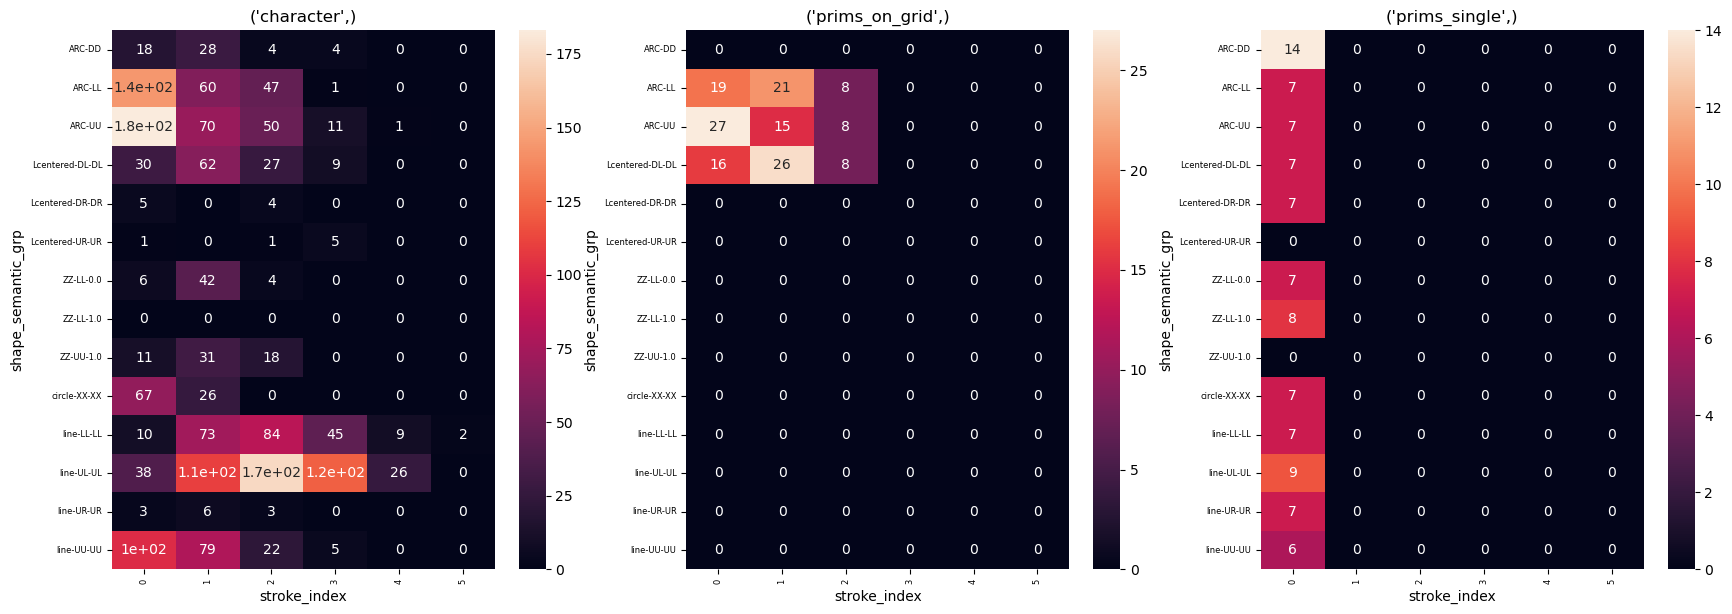

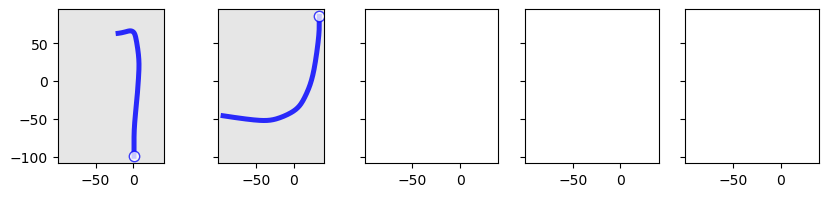

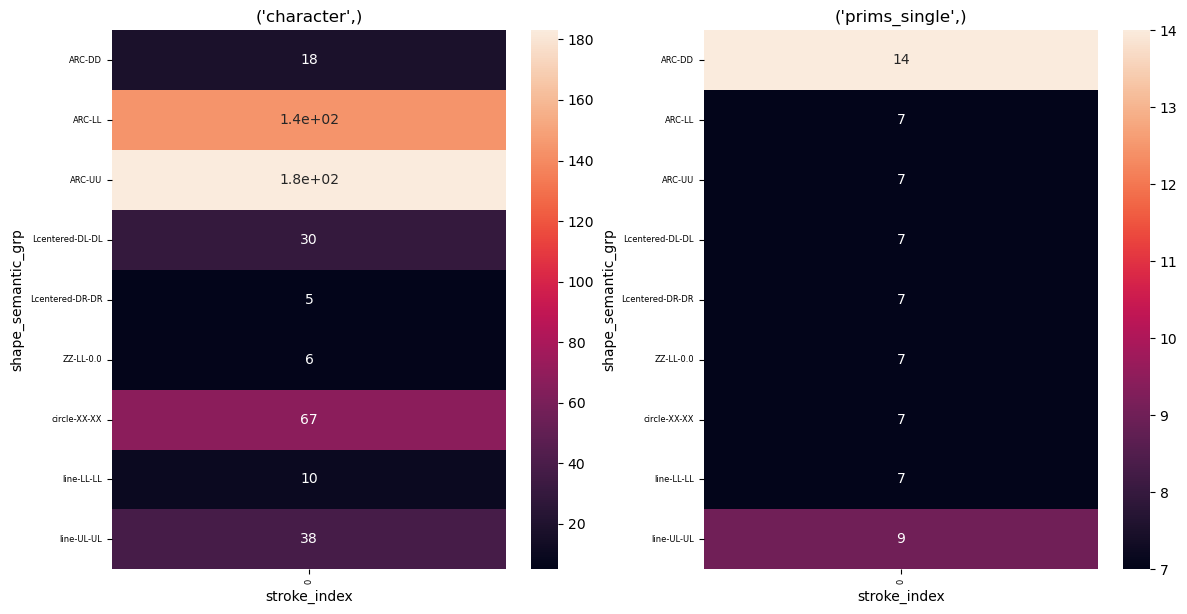

In [13]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved
import os
# prune_version = "sp_char_0"
# prune_version = None
n_min_trials_per_shape = 5
raw_subtract_mean_each_timepoint = False


SAVEDIR_ANALYSIS = "/tmp/TEST_TIME_RESOLV"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

NPCS_KEEP = 10
raw_subtract_mean_each_timepoint = False

twind_analy = (-0.35, 0.5)
tbin_dur = 0.1
tbin_slide = 0.02

# # for bregion in DFallpa["bregion"].unique().tolist():
# for bregion in ["PMv_m"]:
#     # for prune_version in ["sp_char_0", "pig_char_0"]:
#     for prune_version in ["sp_char", "pig_char", "sp_char_0"]:
#         # for subspace_projection in [None, "pca", "shape_prims_single", "shape_all"]:
#         for subspace_projection in [None]:
#             for remove_drift in [False]:
#                 for remove_singleprims_unstable in [True, False]:

#                     SAVEDIR = f"{SAVEDIR_ANALYSIS}/{bregion}-prune={prune_version}-ss={subspace_projection}-nodrift={remove_drift}-SpUnstable={remove_singleprims_unstable}-HACK-{hack_prune_to_these_chans is not None}"
#                     os.makedirs(SAVEDIR, exist_ok=True)
#                     print(SAVEDIR)


#                     euclidian_time_resolved(animal, date, DFallpa, bregion, prune_version, remove_drift, SAVEDIR, twind_analy,
#                                                 tbin_dur, tbin_slide, 
#                                                 subspace_projection, NPCS_KEEP, 
#                                                 n_min_trials_per_shape = 5, 
#                                                 raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
#                                                 hack_prune_to_these_chans=hack_prune_to_these_chans,
#                                                 remove_singleprims_unstable=remove_singleprims_unstable)

#                     assert False

# Compact version of above
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved_wrapper
euclidian_time_resolved_wrapper(animal, date, DFallpa, "/tmp/TEST")

SAVING AT ...  /tmp/TEST_TIME_RESOLV/M1_m-prune=sp_char_0-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (13, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (13, 1975, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (13, 1975, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (13, 710, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (13, 710, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (13, 680, 280)
d_orig 0.46158666343979454
d_rev 0.7037057181251106
0.5277792885938329
remove this shape, not consistent across trials:  line-UU-UU
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-DD', 'ARC-LL', 'ARC-UU', 'Lcentered-DL-DL', 'Lcentered-DR-DR', 'ZZ-LL-0.0', 'circle-XX-XX', 'line-LL-LL', 'line-UL-UL

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


n_max: 4
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572]
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572]
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/M1_m-prune=pig_char_0-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (13, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (13, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (13, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (13, 679, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (13, 679, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (13, 419, 280)
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-LL', 'ARC-UU', 'Lcentered-DL-DL']
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n before filt: (13, 419, 280)
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n after filt: (13, 419, 280)
Sort Indices:
 [0, 1, 2, 3, 4, 5, 6, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Not enough task_kind bloques --- returning copy of input PA
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/M1_m-prune=sp_char-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (13, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (13, 1975, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (13, 1975, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (13, 1900, 280)
d_orig 0.46158666343979454
d_rev 0.7037057181251106
0.5277792885938329
remove this shape, not consistent across trials:  line-UU-UU
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-DD', 'ARC-LL', 'ARC-UU', 'Lcentered-DL-DL', 'Lcentered-DR-DR', 'ZZ-LL-0.0', 'circle-XX-XX', 'line-LL-LL', 'line-UL-UL', 'line-UR-UR']
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n before filt: (13, 1900, 280)
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


n_max: 4
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('prims_single', 3) [1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686]
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('prims_single', 3) [1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686]
---

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/M1_m-prune=pig_char_1plus-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (13, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (13, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (13, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (13, 1351, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (13, 1351, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (13, 424, 280)
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-LL', 'ARC-UU', 'Lcentered-DL-DL']
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n before filt: (13, 424, 280)
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n after filt: (13, 424, 280)
Sort Indices:
 [0, 1, 2, 3, 4, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Not enough task_kind bloques --- returning copy of input PA
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/M1_l-prune=sp_char_0-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (16, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (16, 1975, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (16, 1975, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (16, 710, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (16, 710, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (16, 680, 280)
d_orig 0.46158666343979454
d_rev 0.7037057181251106
0.5277792885938329
remove this shape, not consistent across trials:  line-UU-UU
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-DD', 'ARC-LL', 'ARC-UU', 'Lcentered-DL-DL', 'Lcentered-DR-DR', 'ZZ-LL-0.0', 'circle-XX-XX', 'line-LL-LL', 'line-UL-UL

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


n_max: 4
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572]
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572]
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/M1_l-prune=pig_char_0-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (16, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (16, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (16, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (16, 679, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (16, 679, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (16, 419, 280)
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-LL', 'ARC-UU', 'Lcentered-DL-DL']
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n before filt: (16, 419, 280)
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n after filt: (16, 419, 280)
Sort Indices:
 [0, 1, 2, 3, 4, 5, 6, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/M1_l-prune=sp_char-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (16, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (16, 1975, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (16, 1975, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (16, 1900, 280)
d_orig 0.46158666343979454
d_rev 0.7037057181251106
0.5277792885938329
remove this shape, not consistent across trials:  line-UU-UU
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-DD', 'ARC-LL', 'ARC-UU', 'Lcentered-DL-DL', 'Lcentered-DR-DR', 'ZZ-LL-0.0', 'circle-XX-XX', 'line-LL-LL', 'line-UL-UL', 'line-UR-UR']
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n before filt: (16, 1900, 280)
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


n_max: 4
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('prims_single', 3) [1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686]
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
('prims_single', 3) [1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686]
---

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/M1_l-prune=pig_char_1plus-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (16, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (16, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (16, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (16, 1351, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (16, 1351, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (16, 424, 280)
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-LL', 'ARC-UU', 'Lcentered-DL-DL']
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n before filt: (16, 424, 280)
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n after filt: (16, 424, 280)
Sort Indices:
 [0, 1, 2, 3, 4, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Not enough task_kind bloques --- returning copy of input PA
Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/PMv_m-prune=sp_char_0-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (11, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (11, 1975, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (11, 1975, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (11, 710, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (11, 710, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (11, 680, 280)
d_orig 0.46158666343979454
d_rev 0.7037057181251106
0.5277792885938329
remove this shape, not consistent across trials:  line-UU-UU
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-DD', 'ARC-LL', 'ARC-UU', 'Lcentered-DL-DL', 'Lcentered-DR-DR', 'ZZ-LL-0.0', 'circle-XX-XX', 'line-LL-LL', 'line-UL-U

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


n_max: 4
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572]
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572]
---------
('prims_single', 1) [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
('prims_single', 3) [511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

SAVING AT ...  /tmp/TEST_TIME_RESOLV/PMv_m-prune=pig_char_0-ss=task_shape_si-nodrift=False-SpUnstable=True-subtrmean=False
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (11, 2123, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (11, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n before filt: (11, 2030, 280)
pa.slice_by_labels_filtdict, using var=stroke_index, n after filt: (11, 679, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (11, 679, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (11, 419, 280)
Also removing tese shapes. by hand:  ['line-UU-UU']
Keeping these shapes, becuase they are not similar strokes between SP and CHAR: ['ARC-LL', 'ARC-UU', 'Lcentered-DL-DL']
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n before filt: (11, 419, 280)
pa.slice_by_labels_filtdict, using var=shape_semantic_grp, n after filt: (11, 419, 280)
Sort Indices:
 [0, 1, 2, 3, 4, 5, 6,

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Doing PCA


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


... computing distance matrices, using distnace: euclidian
-0.3449999999999995
-0.32499999999999946
-0.30499999999999944
-0.2849999999999994
-0.2649999999999994
-0.24499999999999938
-0.22499999999999937
-0.20499999999999935
-0.18499999999999933
-0.16499999999999931
-0.1449999999999993
-0.12499999999999926
-0.10499999999999925
-0.08499999999999923
-0.06499999999999921
-0.04499999999999919
-0.024999999999999176
-0.004999999999999158
0.01500000000000086
0.03500000000000088
0.055000000000000895
0.07500000000000091
0.09500000000000093
0.11500000000000095
0.13500000000000095
0.15500000000000097
0.175000000000001
0.195000000000001
0.21500000000000102
0.23500000000000104
0.25500000000000106
0.2750000000000011
0.2950000000000011
0.3150000000000011
0.33500000000000113
0.35500000000000115
0.37500000000000117
0.3950000000000012
0.4150000000000012
0.4350000000000012
0.45500000000000124
0.47500000000000125


/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/

KeyboardInterrupt: 

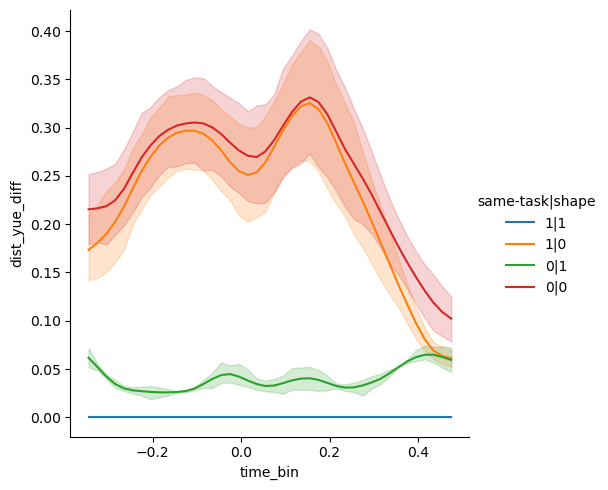

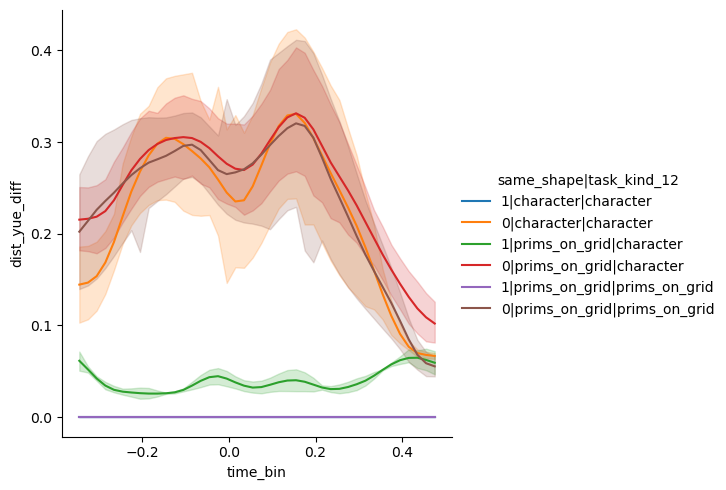

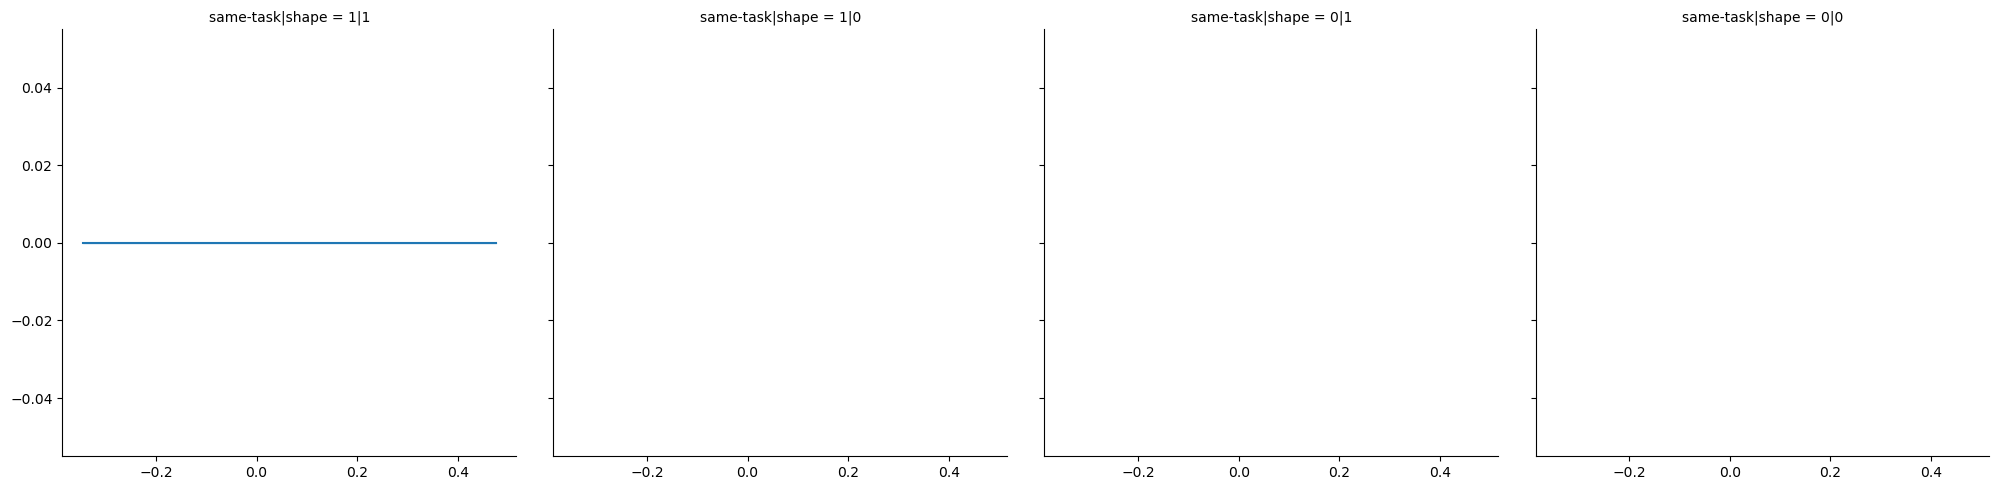

In [46]:
n_min_trials_per_shape = 4
raw_subtract_mean_each_timepoint = False

NPCS_KEEP = 6

twind_analy = (-0.4, 0.5)
tbin_dur = 0.1
tbin_slide = 0.02

for bregion in DFallpa["bregion"].unique().tolist():
    for prune_version in ["sp_char_0", "pig_char_0", "sp_char", "pig_char_1plus"]:
        for subspace_projection in ["task_shape_si"]:
            for remove_drift in [False]:
                for raw_subtract_mean_each_timepoint in [False]:
                    for remove_singleprims_unstable in [True]:
                        SAVEDIR = f"{SAVEDIR_ANALYSIS}/{bregion}-prune={prune_version}-ss={subspace_projection}-nodrift={remove_drift}-SpUnstable={remove_singleprims_unstable}-subtrmean={raw_subtract_mean_each_timepoint}"
                        os.makedirs(SAVEDIR, exist_ok=True)
                        print("SAVING AT ... ", SAVEDIR)
                        euclidian_time_resolved(animal, date, DFallpa, bregion, prune_version, remove_drift, SAVEDIR, twind_analy,
                                                    tbin_dur, tbin_slide, 
                                                    subspace_projection, NPCS_KEEP, 
                                                    n_min_trials_per_shape = n_min_trials_per_shape, raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                                    remove_singleprims_unstable=remove_singleprims_unstable)


In [ ]:

sp0 vs. char0
pig0 vs. char0
pig1plus vs. char1plus


### Time warping based on behavior

In [ ]:
# For each trial, get beh stroke
date

# Checking drift of FR

In [ ]:
# Plot for each trial.
from neuralmonkey.scripts.analy_euclidian_chars_sp import plot_heatmap_firing_rates_all
plot_heatmap_firing_rates_all(PA, savedir)


### Sanity check, change over day?


In [54]:
savedir = f"{SAVEDIR_ANALYSIS}/drift"
os.makedirs(savedir, exist_ok=True)

##### For each region, plot sm fr across trials and time

In [ ]:
# Loop over all bregions
assert False, "run for both chans and PCs"
for i, row in DFallpa.iterrows():
    PAthis = row["pa"]
    bregion = row["bregion"]

    dur = 0.1
    slide = 0.02
    PAthis = PAthis.agg_by_time_windows_binned(dur, slide)


    from neuralmonkey.neuralplots.population import heatmapwrapper_stratified_each_neuron
    fig = heatmapwrapper_stratified_each_neuron(PA, "task_kind")
    assert False
    assert False
    savefig(fig, f"{savedir}/{bregion}.png")
    plt.close("all")
    



In [11]:
import os
SAVEDIR = f"/tmp/CHAR_HEATMAPS"
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
# (1) First, dim reduction
superv_dpca_var = superv_dpca_params['superv_dpca_var']
superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']


dim_red_method = "pca"
twind_analy = (-0.15, 0.3)
tbin_dur = 0.1
tbin_slice = 0.01
NPCS_KEEP = 10
_, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedir, 
                                twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
                                NPCS_KEEP = NPCS_KEEP,
                                dpca_var = None, dpca_vars_group = None, dpca_filtdict=None, 
                                dpca_proj_twind = twind_analy, 
                                raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                umap_n_components=None, umap_n_neighbors=None)


In [ ]:
PAredu.Times

In [ ]:
##### Script for heatmaps

In [ ]:
SAVEDIR

In [ ]:
date

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import params_subspace_projection
from neuralmonkey.scripts.analy_euclidian_chars_sp import plot_heatmap_firing_rates_all, plot_heatmap_firing_rates_all_wrapper

plot_heatmap_firing_rates_all_wrapper(DFallpa, SAVEDIR, animal, date)


# bregion = "FP_p"
# prune_version = "sp_char_0"
# n_min_trials_per_shape = 5
# raw_subtract_mean_each_timepoint = False
# ### FINAL -- script over all
# LIST_SS_PRUNE = [
#     (None, False),
#     ("pca", False),
#     ("shape_prims_single", False),
#     ("pca", True),
#     ("shape_prims_single", True),
# ]
# PA = extract_single_pa(DFallpa, bregion, which_level="stroke", event="00_stroke")

# ################# PREPROCESS
# savedir = f"{SAVEDIR}/preprocess"
# os.makedirs(savedir, exist_ok=True)
# plot_drawings = False
# PA = preprocess_pa(animal, date, PA, savedir, prune_version, 
#                 n_min_trials_per_shape=n_min_trials_per_shape, plot_drawings=plot_drawings)

# for subspace_projection, prune_chans in LIST_SS_PRUNE:

#     savedir = f"{SAVEDIR}/ss={subspace_projection}-prunedrift={prune_chans}"
#     os.makedirs(savedir, exist_ok=True)

#     ########### PRUNE CHANS
#     if prune_chans:
#         # Optioanlly, remove channels with drift
#         from neuralmonkey.classes.population_mult import dfallpa_preprocess_sitesdirty_single_just_drift
#         PA = dfallpa_preprocess_sitesdirty_single_just_drift(PA, animal, date)

#     ########### DIM REDUCTIONS
#     if subspace_projection is not None:
#         dim_red_method, superv_dpca_params = params_subspace_projection(subspace_projection)
#         superv_dpca_var = superv_dpca_params['superv_dpca_var']
#         superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
#         superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']

#         twind_analy = (-0.2, 0.35)
#         tbin_dur = 0.1
#         tbin_slice = 0.01
#         NPCS_KEEP = 10
#         savedirthis = f"{savedir}/dimred-{subspace_projection}"
#         os.makedirs(savedirthis, exist_ok=True)
#         _, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedirthis, 
#                                         twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
#                                         NPCS_KEEP = NPCS_KEEP,
#                                         dpca_var = superv_dpca_var, dpca_vars_group = superv_dpca_vars_group, dpca_filtdict=superv_dpca_filtdict, 
#                                         dpca_proj_twind = twind_analy, 
#                                         raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
#                                         umap_n_components=None, umap_n_neighbors=None)
#     else:
#         PAredu = PA

#     savedirthis = f"{savedir}/heatmaps-{subspace_projection}/{bregion}"
#     os.makedirs(savedirthis, exist_ok=True)
#     plot_heatmap_firing_rates_all(PAredu, savedirthis)

#     plt.close("all")


# # ################## [RAW]
# # savedir = f"{SAVEDIR}/heatmaps_raw/{bregion}"
# # os.makedirs(savedir, exist_ok=True)

# # plot_heatmap_firing_rates_all(PA, savedir)

# # ################# [PCA]
# # dim_red_method = "pca"
# # twind_analy = (-0.15, 0.3)
# # tbin_dur = 0.1
# # tbin_slice = 0.01
# # NPCS_KEEP = 10
# # superv_dpca_var = None
# # superv_dpca_vars_group = None
# # superv_dpca_filtdict = None
# # _, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedir, 
# #                                 twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
# #                                 NPCS_KEEP = NPCS_KEEP,
# #                                 dpca_var = superv_dpca_var, dpca_vars_group = superv_dpca_vars_group, dpca_filtdict=superv_dpca_filtdict, 
# #                                 dpca_proj_twind = twind_analy, 
# #                                 raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
# #                                 umap_n_components=None, umap_n_neighbors=None)

# # savedir = f"{SAVEDIR}/heatmaps_pca/{bregion}"
# # os.makedirs(savedir, exist_ok=True)
# # plot_heatmap_firing_rates_all(PAredu, savedir)


# # ################# [DPCA]
# # dim_red_method = "superv_dpca"
# # superv_dpca_params={
# #     "superv_dpca_var":"shape_semantic",
# #     "superv_dpca_vars_group":None,
# #     "superv_dpca_filtdict":{"task_kind":["prims_single"]}
# # }
# # superv_dpca_var = superv_dpca_params['superv_dpca_var']
# # superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
# # superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']
# # NPCS_KEEP = 6
# # _, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedir, 
# #                                 twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
# #                                 NPCS_KEEP = NPCS_KEEP,
# #                                 dpca_var = superv_dpca_var, dpca_vars_group = superv_dpca_vars_group, dpca_filtdict=superv_dpca_filtdict, 
# #                                 dpca_proj_twind = twind_analy, 
# #                                 raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
# #                                 umap_n_components=None, umap_n_neighbors=None)
# # savedir = f"{SAVEDIR}/heatmaps_dpca/{bregion}"
# # os.makedirs(savedir, exist_ok=True)
# # plot_heatmap_firing_rates_all(PAredu, savedir)



### Accounting for drift -- exclude cases with very different PSTH.

In [20]:
PA = DFallpa["pa"].values[2]

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import preprocess_clean_stable_single_prims_frate
savedir = "/tmp/test"
os.makedirs(savedir, exist_ok=True)
preprocess_clean_stable_single_prims_frate(PA, savedir=savedir)

##### Re-apply filter based on dirty sites, being more strict about drift

In [1]:
# For each grouping, get the meanPSTH, and c

# MULT DATA - euclidian_time_resolved

In [49]:
import pandas as pd

In [50]:
from neuralmonkey.classes.session import _REGIONS_IN_ORDER, _REGIONS_IN_ORDER_COMBINED

import pandas as pd



In [ ]:
# Load all data (all bregions and dates)

# n_min_trials_per_shape = 5
# raw_subtract_mean_each_timepoint = False

# NPCS_KEEP = 6

# twind_analy = (-0.35, 0.5)
# tbin_dur = 0.1
# tbin_slide = 0.02

# SAVEDIR_MULT = f"/lemur2/lucas/analyses/recordings/main/euclidian_char_sp/EUCL_TIME_RESOLV/MULT"
SAVEDIR_MULT = f"/lemur2/lucas/analyses/recordings/main/euclidian_char_sp/EUCL_TIME_RESOLV/n_min=5/MULT"
 
# LIST_ANIMAL_DATE_COMB = [
#     ("Pancho", 230119, False),
#     ("Pancho", 230120, False),
#     ("Pancho", 230122, False),
#     ("Pancho", 230125, False),
#     ("Pancho", 230126, False),
#     ("Pancho", 230127, False),
# ]

# LIST_ANIMAL_DATE_COMB = [
#     # ("Pancho", 220531, False),
#     # ("Pancho", 220602, False),
#     ("Pancho", 220603, False),
#     ("Pancho", 220618, False),
#     ("Pancho", 220626, False),
#     ("Pancho", 220628, False),
#     ("Pancho", 220630, False),
# ]
      
LIST_ANIMAL_DATE_COMB = [
    ("Pancho", 230119, False),
    ("Pancho", 230120, False),
    ("Pancho", 230122, False),
    ("Pancho", 230125, False),
    ("Pancho", 230126, False),
    ("Pancho", 230127, False),
    ("Pancho", 220603, False),
    ("Pancho", 220618, False),
    ("Pancho", 220626, False),
    ("Pancho", 220628, False),
    ("Pancho", 220630, False),
]
      
# LIST_ANIMAL_DATE_COMB = [
#     # ("Diego", 231130, True),
#     ("Diego", 231205, True),
#     ("Diego", 231211, True),
#     ("Diego", 231122, True),
#     ("Diego", 231128, True),
#     ("Diego", 231129, True),
#     ("Diego", 231201, True),
#     ("Diego", 231213, True),
#     ("Diego", 231204, True),
# ]

list_df = []

for animal, date, combine in LIST_ANIMAL_DATE_COMB:
    SAVEDIR_ANALYSIS = f"/lemur2/lucas/analyses/recordings/main/euclidian_char_sp/n_min=5/EUCL_TIME_RESOLV/{animal}-{date}-combine={combine}"

    if combine:
        REGIONS = _REGIONS_IN_ORDER_COMBINED
    else:
        REGIONS = _REGIONS_IN_ORDER
        REGIONS = [r for r in REGIONS if not r=="PMv_l"]

    for bregion in REGIONS:
        for prune_version in ["sp_char_0", "pig_char_0", "sp_char", "pig_char"]:
            if prune_version in ["sp_char_0"]:
                subspace_projection_extra = "shape_prims_single"
            elif prune_version in ["pig_char_0", "pig_char", "sp_char"]:
                subspace_projection_extra = "shape_all"
            else:
                print(prune_version)
                assert False
                
            for subspace_projection in [None, "pca", subspace_projection_extra]:
                for remove_drift in [False]:
                    for raw_subtract_mean_each_timepoint in [False]:
                        for remove_singleprims_unstable in [False, True]:
                            SAVEDIR = f"{SAVEDIR_ANALYSIS}/{bregion}-prune={prune_version}-ss={subspace_projection}-nodrift={remove_drift}-SpUnstable={remove_singleprims_unstable}-subtrmean={raw_subtract_mean_each_timepoint}"

                            print(SAVEDIR)
                            try:
                                path = f"{SAVEDIR}/DFDIST.pkl"
                                dfdist = pd.read_pickle(path)
                            except FileNotFoundError as err:
                                if animal=="Pancho" and bregion in ["FP_a", "FP_p", "FP", "PMv_l"]:
                                    print("Skipping this region:", bregion, animal)
                                elif animal=="Diego" and bregion in ["dlPFC_p", "FP_a", "FP_p", "FP"]:
                                    print("Skipping this region:", bregion, animal)
                                else:
                                    raise err

                            dfdist["animal"] = animal
                            dfdist["date"] = date
                            dfdist["bregion"] = bregion
                            dfdist["prune_version"] = prune_version
                            dfdist["subspace_projection"] = subspace_projection
                            dfdist["remove_drift"] = remove_drift
                            dfdist["raw_subtract_mean_each_timepoint"] = raw_subtract_mean_each_timepoint
                            dfdist["remove_singleprims_unstable"] = remove_singleprims_unstable

                            list_df.append(dfdist)
            # assert False

In [52]:
# NOTE: For plots, see analy_euclidian_chars_sp_MULT.py

##### Convert to scalar

In [ ]:
twind_scalar = [-0.3, 0.1]
dfdist.columns

In [54]:
from pythonlib.tools.pandastools import append_col_with_grp_index
DFDIST = pd.concat(list_df).reset_index(drop=True)
DFDIST = append_col_with_grp_index(DFDIST, ["prune_version", "subspace_projection", "remove_drift", "raw_subtract_mean_each_timepoint", 
                                   "remove_singleprims_unstable"], "metaparams")


In [55]:
# Prune to time window
DFDISTthis = DFDIST[(DFDIST["time_bin"]>=twind_scalar[0]) & (DFDIST["time_bin"]<=twind_scalar[1])].reset_index(drop=True)

# Agg, averaging over time
from pythonlib.tools.pandastools import aggregGeneral
DFTHISscal = aggregGeneral(DFDISTthis, ["animal", "date", "bregion", "metaparams", "same-task|shape"], values=["dist_mean", "dist_norm", "dist_yue_diff"])


In [ ]:
DFTHISscal

In [ ]:
# Plot
import seaborn as sns
sns.catplot(data=DFTHISscal, x="bregion", y="dist_yue_diff")

In [ ]:
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
plot_45scatter_means_flexible_grouping(DFTHISscal, "same-task|shape", "0|1", "1|0", 
                                       "metaparams", "dist_yue_diff", "bregion", 
                                       True, shareaxes=True, SIZE=4);

# Cross-temporal scoring

Consider each timebin for char vs. each timebin for SP.

For each, get scores of diff|same, etc.


In [ ]:

# - Reshape PA so that time is on the trial axis.
from neuralmonkey.classes.population import concatenate_popanals

list_pa = []
list_labels = []
for i in range(len(PAredu.Times)):
    pathis = PAredu.slice_by_dim_indices_wrapper("times", [i])

    # collect infoextract_snippets_trials
    list_pa.append(pathis)
    list_labels.append(i)

PAreduScal = concatenate_popanals(list_pa, dim="trials", 
                                map_idxpa_to_value=list_labels, 
                                map_idxpa_to_value_colname="time_bin",
                                assert_otherdims_have_same_values=False,
                                times_realign_so_first_index_is_this_time=0)
PAreduScal.Times

In [ ]:
Cldist = PAreduScal.dataextract_as_distance_matrix_clusters_flex(["task_kind", "shape_semantic", "time_bin"], 
                                                             return_as_single_mean_over_time=True)



In [164]:
dfres = Cldist.rsa_distmat_score_all_pairs_of_label_groups(False)


In [165]:
dfres["task_kind_same"] = dfres["task_kind_1"] == dfres["task_kind_2"]
dfres["shape_semantic_same"] = dfres["shape_semantic_1"] == dfres["shape_semantic_2"]
dfres = append_col_with_grp_index(dfres, ["shape_semantic_same", "task_kind_same"], "shape_task_same")
dfres = append_col_with_grp_index(dfres, ["task_kind_1", "task_kind_2"], "task_kind_pair")
dfres = append_col_with_grp_index(dfres, ["shape_semantic_1", "shape_semantic_2"], "shape_semantic_pair")
dfres = append_col_with_grp_index(dfres, ["time_bin_1", "time_bin_2"], "time_bin_pair")

dfres = append_col_with_grp_index(dfres, ["shape_semantic_same", "task_kind_1", "task_kind_2"], "ss_task_kind_pair")


In [ ]:
dfres

In [ ]:
plot_subplots_heatmap(dfres, "time_bin_1", "time_bin_2", "dist_yue_diff", "ss_task_kind_pair", share_zlim=True)
plot_subplots_heatmap(dfres, "time_bin_1", "time_bin_2", "dist_mean", "ss_task_kind_pair", share_zlim=True)


In [171]:
# TODO: Take difference across subplots, plotting a new subplot.

# Check motor similarity of strokes from SP vs. CHAR

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import preprocess_pa
from neuralmonkey.classes.population_mult import extract_single_pa

savedir = "/tmp/PREPROCESS"
os.makedirs(savedir, exist_ok=True)
PA = preprocess_pa(PA, savedir)

# Collect and plot across days

In [ ]:
SAVEDIR_SAVE = f"/lemur2/lucas/analyses/recordings/main/euclidian_char_sp/MULT"

list_animal_date = [
    # ("Pancho", 230112),
    # ("Pancho", 230117),
    # ("Pancho", 230118),
    ("Pancho", 230119),
    ("Pancho", 230120),
    ("Pancho", 230122),
    ("Pancho", 230125),
    ("Pancho", 230126),
    ("Pancho", 230127),
    ]

combine = True
ANIMAL = "Pancho"

LIST_NPCS_KEEP = [4,6,2]
for twind_analy in [(0.05, 0.25), (-0.05, 0.35), (0.1, 0.2)]:
    for subspace_projection in ["shape_prims_single", "pca"]:
        for prune_version in ["sp_char_0", "sp_char"]:
            for NPCS_KEEP in LIST_NPCS_KEEP:
                for raw_subtract_mean_each_timepoint in [False, True]:

                    # subspace_projection = "shape_prims_single"
                    # prune_version = "sp_char_0"
                    # NPCS_KEEP = 4
                    # raw_subtract_mean_each_timepoint = False
                    # twind_analy = (0.05, 0.25)

                    try:
                        ### Load all data for this params configuration
                        list_dfres = []
                        for animal, date in list_animal_date:
                            if animal==ANIMAL:
                                # animal = "Pancho"
                                # date = 230126

                                SAVEDIR_ANALYSIS = f"/lemur2/lucas/analyses/recordings/main/euclidian_char_sp/{animal}-{date}-combine={combine}"
                                path = f"{SAVEDIR_ANALYSIS}/subspc={subspace_projection}-prunedat={prune_version}-npcs={NPCS_KEEP}-subtr={raw_subtract_mean_each_timepoint}-twind={twind_analy}/summary/DFRES.pkl"
                                dfres = pd.read_pickle(path)

                                dfres["animal"] = animal
                                dfres["date"] = date

                                list_dfres.append(dfres)
                    except FileNotFoundError as err:
                        print("Skipping, did not find all data...", path)
                        continue

                    ######### PLOTS
                    savedir = f"{SAVEDIR_SAVE}/{ANIMAL}/combine={combine}-subspc={subspace_projection}-prunedat={prune_version}-npcs={NPCS_KEEP}-subtr={raw_subtract_mean_each_timepoint}-twind={twind_analy}"
                    os.makedirs(savedir, exist_ok=True)

                    DFRES = pd.concat(list_dfres).reset_index(drop=True)

                    from pythonlib.tools.pandastools import append_col_with_grp_index
                    DFRES = append_col_with_grp_index(DFRES, ["animal", "date"], "ani_dat")

                    from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
                    _, fig = plot_45scatter_means_flexible_grouping(DFRES, "shape_task_same", "1|0", "0|1", "bregion", 
                                                                    "dist_yue_diff", "ani_dat", True, SIZE=3, shareaxes=True);
                    savefig(fig, f"{savedir}/scatter-1.pdf")

                    _, fig = plot_45scatter_means_flexible_grouping(DFRES, "shape_task_same", "1|0", "0|1", None, 
                                                                    "dist_yue_diff", "bregion", True, SIZE=4, shareaxes=True);
                    savefig(fig, f"{savedir}/scatter-2.pdf")

                    _, fig = plot_45scatter_means_flexible_grouping(DFRES, "shape_task_same", "1|0", "0|1", "bregion", 
                                                                    "dist_yue_diff", "ani_dat", False, SIZE=6, shareaxes=True,
                                                                    color_by_var_datapt=True, alpha=0.5,
                                                                    force_all_on_same_axis=True);
                    savefig(fig, f"{savedir}/scatter-3.pdf")

                    fig = sns.catplot(data=DFRES, x = "bregion", hue="shape_task_same", y="dist_yue_diff", kind="bar", aspect=2)
                    savefig(fig, f"{savedir}/catplot-1.pdf")

                    fig = sns.catplot(data=DFRES, x = "bregion", hue="ani_dat", y="dist_yue_diff", kind="point", aspect=2, col="shape_task_same", col_wrap=2)
                    savefig(fig, f"{savedir}/catplot-2.pdf")


                    plt.close("all")